<a href="https://colab.research.google.com/github/EmmanuelAdio/AAI-Coursework/blob/main/AAI_Coursework_CNN_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>  ***Training Convolutional Neural Networks Using Genetic Algorithms and Enhancing Performance with Ensemble Learning*** </center>

---

## **Abstract**
This tutorial explores how to train Convolutional Neural Networks (CNNs) using GA, evaluating different CNN architectures to assess their effectiveness. After comparing GA-trained models in terms of accuracy, convergence speed, and computational cost, we further enhance performance by applying ensemble learning techniques. The goal is to demonstrate how model ensembling can improve classification accuracy by leveraging multiple GA-optimized networks for better decision-making.

## **Learning objective**
By the end of this tutorial, you will:

- **Understand Genetic Algorithms (GA)** and how they can be used to optimize Convolutional Neural Networks (CNNs).  
- **Implement GA for CNN training in PyTorch**, including selection, crossover, and mutation techniques.  
- **Compare different CNN models trained using GA**, analyzing accuracy, convergence, and computational efficiency.  
- **Apply Ensemble Learning techniques** to improve classification performance by combining GA-trained CNNs.  
- **Visualize model performance** using accuracy/loss curves and per-class accuracy analysis.  
- **Gain practical experience** in evolutionary optimization and ensemble learning, enhancing deep learning pipelines.  

## **Table of Contents**
1. [Introduction](#Introduction)
2. [CNN Architectures Used](#CNN-Architectures-Used)
3. [Implementing Genetic Algorithm for CNN Training](#Implementing-Genetic-Algorithm-for-CNN-Training)
4. [Comparing CNNs Trained Using Genetic Algorithms](#Comparing-CNNs-Trained-Using-Genetic-Algorithms)
5. [Ensemble Learning: Combining GA-Trained CNNs](#Ensemble-Learning-Combining-GA-Trained-CNNs)
6. [Evaluation and Visualization](#Evaluation-and-Visualization)
7. [Conclusion](#Conclusion)
8. [Tutorial comparison](#Tutorial-comaprison)
9. [References](#References)
<br>
<br>
---


## **Introduction**
Training **Convolutional Neural Networks (CNNs)** efficiently is a key challenge in deep learning. Traditional optimization techniques such as **Stochastic Gradient Descent (SGD)** and **Adam** rely on backpropagation to update model weights. However, **Genetic Algorithms (GAs)** provide an alternative approach by evolving network parameters through a population-based optimization process.

This tutorial explores how **Genetic Algorithms (GA) can be used to train CNNs** without relying on gradient-based methods. By implementing **selection, crossover, and mutation**, we optimize CNN weights across multiple generations. The **performance of GA-trained CNNs** is then evaluated and compared, highlighting accuracy trends and computational costs.

Finally, we **apply ensemble learning techniques** to combine multiple GA-trained models into a single classifier, aiming to improve classification performance. This hybrid approach leverages the strengths of different models, leading to a more robust deep learning solution.

### **What is a CNN?** <br>
A **Convolutional Neural Network (CNN)** is a type of deep learning model specifically designed for **image classification and processing**. Unlike traditional neural networks, CNNs use specialized layers to extract spatial and hierarchical features from images.

CNNs are widely used in **computer vision tasks**, such as **object detection, facial recognition, and medical imaging**, due to their ability to automatically learn important features from raw pixel data.

---

### **How Do CNNs Work?** <br>
CNNs operate by applying a series of transformations to an input image, gradually extracting meaningful patterns:

| **Stage** | **Description** |
|-----------|---------------|
| **1. Convolution** | Applies **filters (kernels)** to detect patterns like edges and textures. |
| **2. Activation Function (ReLU)** | Introduces **non-linearity** to allow the model to learn complex features. |
| **3. Pooling (Max/Average)** | Downsamples the feature maps, reducing computation and improving generalization. |
| **4. Flattening** | Converts multi-dimensional feature maps into a 1D vector for classification. |
| **5. Fully Connected (FC) Layers** | Processes extracted features and makes predictions. |

Each layer contributes to making CNNs **highly efficient for image recognition tasks**.

### **What is a Genetic Algorithm?**
A **Genetic Algorithm (GA)** is an evolutionary optimization technique inspired by **natural selection**. It evolves a population of solutions over generations to optimize a given objective function. Instead of using gradients to adjust weights (as in traditional deep learning), GA applies:
- **Selection**: Choosing the best-performing models (high accuracy CNNs).
- **Crossover**: Mixing features from selected models to create new ones.
- **Mutation**: Slightly altering model parameters to introduce diversity.


---
### **Libraries**


In [ ]:
# PyTorch libraries for neural network operations and optimization algorithms.
import torch                                    # torch: PyTorch library for tensor operations and neural network functionalities.
import torch.nn as nn                           # torch.nn: PyTorch library for neural network layers and operations.
import torch.nn.functional as F                 # torch.nn.functional: PyTorch library for activation functions and other neural network operations.
import torch.optim as optim                     # torch.optim: PyTorch library for optimization algorithms like SGD and Adam.
import torchvision                              # torchvision: PyTorch library for computer vision tasks.
import torchvision.transforms as transforms     # torchvision.transforms: PyTorch library for data augmentation and preprocessing of images.

import matplotlib.pyplot as plt                 # matplotlib.pyplot: For plotting graphs and visualizing images.
import numpy as np                              # numpy: For numerical operations and array manipulations.

import time                                     # time: For measuring training and evaluation time.
import random                                   # random: For random operations like shuffling and selecting random samples.

import seaborn as sns
from sklearn.metrics import confusion_matrix

import pandas as pd

In [7]:
# print the system information
print("Torch version : ", torch.__version__)                                  # PyTorch version
print("Cuda availability : ", torch.cuda.is_available(), "\n")                # GPU availability

if torch.cuda.is_available():
	print("Device name : ",torch.cuda.get_device_name(0))        # GPU device name
	print("Device ID : ",torch.cuda.current_device())          # GPU device ID
else:
	print("CUDA is not available. Running on CPU.")

Torch version :  2.5.1
Cuda availability :  False 

CUDA is not available. Running on CPU.


---
### **Dataset Used: CIFAR-10**

The **CIFAR-10** dataset is used for training and evaluating the CNN models in this tutorial. It is a well-known benchmark dataset in computer vision, widely used for image classification tasks.

#### **Dataset Overview**
- **Total Images**: 60,000
- **Image Size**: 32x32 pixels
- **Number of Classes**: 10
- **Training Set**: 50,000 images
- **Test Set**: 10,000 images
- **Color Channels**: RGB (3 channels)

#### **CIFAR-10 Classes**
The dataset contains **10 categories**, each with **6,000 images**:
1. **Plane**  
2. **Car**  
3. **Bird**
4. **Cat**  
5. **Deer**  
6. **Dog**
7. **Frog**
8. **Horse**
9. **Ship**
10. **Truck**

In [8]:
#CIFAR10 dataset

# Load and normalise CIFAR10 dataset from Source [1]
# Define a transform to normalize the data
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Set the batch size for loading data
batch_size = 4

# Download and load the training dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

# Download and load the test dataset
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

# Define the classes in the dataset
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

### End of source [1]

# source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

Files already downloaded and verified
Files already downloaded and verified


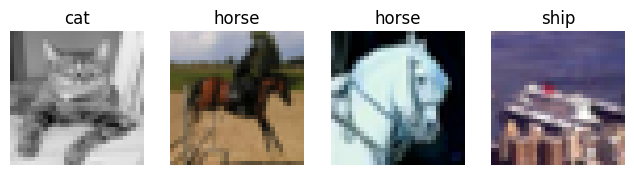

In [9]:
#function that shows images with their labels
def show_images_labels(images, labels):
    plt.figure(figsize=(10, 4))
    for i in range(4):
        plt.subplot(2, 5, i + 1)
        img = images[i] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(f"{classes[labels[i]]}")
        plt.axis('off')
    plt.show()

# get some random training images.
dataiter = iter(trainloader)
images, labels = next(dataiter)

show_images_labels(images, labels)

---

## **CNN Architectures Used** <a id="CNN-Architectures-Used"></a>

**CNN Architectures Used in This Project** <br>

This project implements and compares three different **Convolutional Neural Network (CNN)** architectures for **CIFAR-10 image classification**:

1. **Custom CNN Model (CNN)**
2. **Modified CNN Model (CNN_2)**
3. **LeNet-5 (Modified for CIFAR-10)**

These models are designed to process **RGB images of size 32x32x3** and classify them into one of **10 CIFAR-10 classes**.

---


**Custom CNN Model (CNN)** <br>
The **Custom CNN Model** is a simple yet effective architecture for CIFAR-10 classification. It consists of:
- **Two convolutional layers** for feature extraction.
- **Two max pooling layers** for reducing spatial dimensions.
- **Two fully connected layers** for classification.

**Model Architecture**
| **Layer Type**  | **Details** |
|-----------------|------------|
| **Conv2D (1st Layer)** | 32 filters, kernel size **3x3**, stride **1**, padding **1** |
| **Activation**  | ReLU |
| **Max Pooling** | Kernel size **2x2**, stride **2** |
| **Conv2D (2nd Layer)** | 64 filters, kernel size **3x3**, stride **1**, padding **1**|
| **Activation**  | ReLU |
| **Max Pooling** | Kernel size **2x2**, stride **2** |
| **Flatten**     | Converts feature maps into a 1D vector |
| **Fully Connected (FC1)** | 128 neurons, ReLU |
| **Fully Connected (FC2)** | 10 neurons, Log Softmax for classification |

**Modifications for CIFAR-10:**
- Adjusted input channels to **3** (RGB images).
- Adjusted the input size for the fully connected layer.
- Output layer has **10 neurons** for CIFAR-10 classes.
- Uses **ReLU activation** instead of traditional **tanh** to improve convergence.

In [10]:
# Define the CNN model from Source [2] modified so it can be used for CIFAR10 dataset
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)  # Changed input channels to 3 for RGB images
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted input size for fully connected layer
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 64 * 8 * 8)  # Adjusted view size to match the output of conv layers
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)
### End of source [2]


---

**Modified CNN Model (CNN_2)** <br>
This architecture improves on the basic CNN by incorporating **dropout regularization** and a different convolutional structure. It consists of:
- **Two convolutional layers** with increased filter depth.
- **Two pooling layers** to downsample feature maps.
- **Dropout layer** to prevent overfitting.
- **Fully connected output layer** using log softmax for classification.

**Model Architecture**
| **Layer Type**  | **Details** |
|-----------------|------------|
| **Conv2D (1st Layer)** | 12 filters, kernel size **5x5** |
| **Activation**  | ReLU |
| **Max Pooling** | Kernel size **2x2**, stride **2** |
| **Conv2D (2nd Layer)** | 24 filters, kernel size **5x5** |
| **Activation**  | ReLU |
| **Max Pooling** | Kernel size **2x2**, stride **2** |
| **Dropout** | 20% probability to prevent overfitting |
| **Flatten** | Converts feature maps into a 1D vector |
| **Fully Connected (FC - Output Layer)** | 10 neurons, Log Softmax for classification |

**Modifications for CIFAR-10:**
- Increased filter depth (12 and 24 filters for improved feature extraction).
- Added **Dropout layer** for better generalization.
- Uses **Log Softmax** for stable probability distribution in classification.


In [ ]:
# modified the defined model from source [4] to be used for the CIFAR10 dataset
class CNN_2(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN_2, self).__init__()

        # In the init function, we define each layer we will use in our model

        # Our images are RGB, so we have input channels = 3.
        # We will apply 12 filters in the first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5)

        # A second convolutional layer takes 12 input channels, and generates 24 outputs
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5)

        # We in the end apply max pooling with a kernel size of 2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # A drop layer deletes 20% of the features to help prevent overfitting
        self.drop = nn.Dropout2d(p=0.2)

        # We need to flatten these in order to feed them to a fully-connected layer
        self.fc = nn.Linear(in_features=5 * 5 * 24, out_features=num_classes)

    def forward(self, x):
        # In the forward function, pass the data through the layers we defined in the init function

        # Use a ReLU activation function after layer 1 (convolution 1 and pool)
        x = F.relu(self.pool(self.conv1(x)))

        # Use a ReLU activation function after layer 2
        x = F.relu(self.pool(self.conv2(x)))

        # Select some features to drop to prevent overfitting (only drop during training)
        x = F.dropout(self.drop(x), training=self.training)

        # Flatten
        x = x.view(-1, 5 * 5 * 24)
        # Feed to fully-connected layer to predict class
        x = self.fc(x)
        # Return class probabilities via a log_softmax function
        return torch.log_softmax(x, dim=1)
### End of source [4]


---

**LeNet-5 (Modified for CIFAR-10)** <br>
LeNet-5 is a **classic CNN architecture** originally designed for digit classification (**MNIST**). It has been **modified for CIFAR-10** by:
- Supporting **RGB images** instead of grayscale.
- Adjusting the number of channels and parameters to fit CIFAR-10.
- Using **Tanh**.

**Model Architecture**
| **Layer Type**  | **Details** |
|-----------------|------------|
| **Conv2D (1st Layer)** | 6 filters, kernel size **5x5** |
| **Activation**  | Tanh |
| **Max Pooling** | Kernel size **2x2** |
| **Conv2D (2nd Layer)** | 16 filters, kernel size **5x5** |
| **Activation**  | Tanh |
| **Max Pooling** | Kernel size **2x2** |
| **Flatten** | Converts feature maps into a 1D vector |
| **Fully Connected (FC1)** | 120 neurons, Tanh |
| **Fully Connected (FC2)** | 84 neurons, Tanh |
| **Fully Connected (Output Layer)** | 10 neurons (one per class) |

**Modifications for CIFAR-10:**
- Adjusted input channels from **1 (grayscale) to 3 (RGB)**.
- Maintained **Tanh activations** for compatibility with the original design.
- Adjusted fully connected layers to handle CIFAR-10 images properly.
- Outputs a **softmax probability distribution** over 10 classes.


In [ ]:
# Define the CNN model from Source [3] modified so it can be used for CIFAR10 dataset
class LeNet5(nn.Module):
    def __init__(self, num_classes=10):
        super(LeNet5, self).__init__()
        
        self.num_classes = num_classes
        in_channels = 3

        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            nn.Tanh(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Tanh(),
            nn.Linear(120*in_channels, 84*in_channels),
            nn.Tanh(),
            nn.Linear(84*in_channels, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return probas
### End of source [3]



---

**Summary of Modifications for CIFAR-10**
| **Model** | **Key Modifications** |
|----------|-------------------|
| **CNN** | Increased input channels to 3, ReLU activation, CIFAR-10 output size |
| **CNN_2** | Added dropout, increased filter size, Log Softmax for stability |
| **LeNet-5** | RGB support, minor tweaks to convolutional layers and activations |

Each model is **evaluated on CIFAR-10** using different optimization techniques to compare performance and generalization ability.

### **Key training and testing functions.**

#### **Testing**

In [12]:
def test_nn(model, testloader, use_gpu=True):
    """
    Efficiently tests the model on all images in the test set and returns overall accuracy.

    Args:
        testloader: PyTorch DataLoader for test data.
        model: Trained PyTorch model.
        use_gpu (bool, optional): If True, uses GPU if available. Default is True.

    Returns:
        overall_accuracy (float): Accuracy of the model on the test set.
    """
    # Select device (GPU if available, otherwise CPU)
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)

    model.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    # Disable gradient computation for efficiency
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU/CPU
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)  # Get predicted class

            # Update total and correct predictions
            total += labels.size(0)
            correct += (predictions == labels).sum().item()

    # Compute overall accuracy
    overall_accuracy = 100 * correct / total

    # print(f"Overall Model Accuracy: {overall_accuracy:.2f}%")
    return overall_accuracy


In [13]:
def test_nn_per_class(model, testloader, classes, use_gpu=True):
    """
    Efficiently tests the model on all images in the test set and returns per-class accuracy.

    Args:
        testloader: PyTorch DataLoader for test data.
        model: Trained PyTorch model.
        classes: List of class labels.
        use_gpu (bool, optional): If True, uses GPU if available. Default is True.

    Returns:
        class_accuracies (dict): Dictionary containing accuracy for each class.
    """
    # Select device (GPU if available, otherwise CPU)
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()  # Set model to evaluation mode

    # Prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}

    # Disable gradient computation for efficiency
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU/CPU
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)  # Get predicted class

            # Update per-class statistics
            for label, prediction in zip(labels, predictions):
                total_pred[classes[label.item()]] += 1  # Count total instances of each class
                if label == prediction:
                    correct_pred[classes[label.item()]] += 1  # Count correct predictions

    # Compute per-class accuracy
    class_accuracies = {
        classname: (100 * correct_pred[classname] / total_pred[classname]) if total_pred[classname] > 0 else 0.0
        for classname in classes
    }

    print("Finished per-class testing.")
    return class_accuracies


#### **Training**

In [15]:
def train_nn(model, trainloader, criterion, optimizer, epochs=2, use_gpu=True, lr_scheduler=False):
    """
    Train a PyTorch CNN model efficiently.

    Args:
        model: PyTorch model to train.
        trainloader: DataLoader containing training data.
        criterion: Loss function.
        optimizer: Optimizer (Adam, SGD, etc.).
        epochs (int, optional): Number of training epochs. Default is 2.
        use_gpu (bool, optional): If True, enables GPU acceleration.
        lr_scheduler (bool, optional): If True, reduces learning rate when loss stops improving.

    Returns:
        train_losses: List of training losses over epochs.
        train_accuracies: List of training accuracies.
        total_training_time: Total training time.
    """

    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU

    # lists to store losses and accuracies
    train_losses = []
    train_accuracies = []
    test_accuracies = []
    total_training_time = 0

    # Learning Rate Scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5) if lr_scheduler else None

    for epoch in range(epochs):
        model.train()
        epoch_start_time = time.time()

        running_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(trainloader)
        epoch_accuracy = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        # get the model acuracy on the test data
        test_accuracy = test_nn(model, testloader, use_gpu)
        test_accuracies.append(test_accuracy)

        # Adjust learning rate if using scheduler
        if lr_scheduler:
            scheduler.step(epoch_loss)

        epoch_training_time = time.time() - epoch_start_time
        total_training_time += epoch_training_time

        print(f"Epoch {epoch+1}/{epochs} | Loss: {epoch_loss:.4f} | Train_Accuracy: {epoch_accuracy:.2f}% | Test_Accuracy: {test_accuracy:.2f} | Time: {epoch_training_time:.2f}s")

    return train_losses, train_accuracies, total_training_time, test_accuracies

---

## **Implementing Genetic Algorithm for CNN Training** <a id="Implementing-Genetic-Algorithm-for-CNN-Training"></a>
In this section, we implement a **Genetic Algorithm (GA) to train Convolutional Neural Networks (CNNs)** without using traditional backpropagation. Instead of gradient-based optimization, we evolve CNN parameters over generations using:
- **Selection** (choosing the best models),
- **Crossover** (combining parameters from two parent models),
- **Mutation** (applying small random changes to model parameters).


### **Step 1: Compute Fitness of a Model**
The **fitness function** evaluates a model's performance based on its **test accuracy** after training.


In [13]:
def compute_fitness(criterion, model, optimizer, trainloader, testloader, epochs):
    """
    Computes the fitness of a model by training and evaluating its accuracy.

    Args:
        criterion: Loss function.
        model: PyTorch model to train and evaluate.
        optimizer: Optimizer (Adam, SGD, etc.).
        trainloader: DataLoader containing training data.
        testloader: DataLoader containing test data.
        epochs (int): Number of training epochs.

    Returns:
        fitness (float): Accuracy of the model on the test set.
    """
    # Train the model
    train_nn(model, trainloader, criterion, optimizer, epochs)

    # Test the model
    fitness = test_nn(model, testloader)
    return fitness

### **Step 2: Initialize a Population of CNNs**
A **population** consists of randomly initialized CNN models.


In [14]:
# write a function to initialise the population
def initialise_population(population_size, model_class):
    """
    Initializes a population of models.

    Args:
        population_size (int): Number of models in the population.
        model_class (class): The class of the model to be instantiated.

    Returns:
        population (list): List of instantiated models.
    """
    population = []
    for i in range(population_size):
        model = model_class()
        population.append(model)
    return population

### **Step 3: Crossover Operation**
The **crossover function** combines parameters from two parent models to create two child models.

In [ ]:
# write the function to perform the crossover operation
def crossover(parent1, parent2, use_gpu=True):
    """
    Performs crossover operation between two parent models to produce two child models.

    Args:
        parent1: First parent model (CNN or LeNet5).
        parent2: Second parent model (CNN or LeNet5).
        use_gpu (bool, optional): If True, uses GPU if available. Default is True.

    Returns:
        child1: First child model.
        child2: Second child model.
    """
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")

    if isinstance(parent1, CNN) and isinstance(parent2, CNN):
        # Initialize child models
        child1 = CNN().to(device)
        child2 = CNN().to(device)

        # Perform crossover on the convolutional layers
        child1.conv1.weight.data = torch.cat((parent1.conv1.weight.data[:16], parent2.conv1.weight.data[16:]), dim=0).to(device)
        child2.conv1.weight.data = torch.cat((parent2.conv1.weight.data[:16], parent1.conv1.weight.data[16:]), dim=0).to(device)
        child1.conv2.weight.data = torch.cat((parent1.conv2.weight.data[:32], parent2.conv2.weight.data[32:]), dim=0).to(device)
        child2.conv2.weight.data = torch.cat((parent2.conv2.weight.data[:32], parent1.conv2.weight.data[32:]), dim=0).to(device)

        # Perform crossover on the fully connected layers
        child1.fc1.weight.data = torch.cat((parent1.fc1.weight.data[:64], parent2.fc1.weight.data[64:]), dim=0).to(device)
        child2.fc1.weight.data = torch.cat((parent2.fc1.weight.data[:64], parent1.fc1.weight.data[64:]), dim=0).to(device)
        child1.fc2.weight.data = torch.cat((parent1.fc2.weight.data[:5], parent2.fc2.weight.data[5:]), dim=0).to(device)
        child2.fc2.weight.data = torch.cat((parent2.fc2.weight.data[:5], parent1.fc2.weight.data[5:]), dim=0).to(device)

    elif isinstance(parent1, LeNet5) and isinstance(parent2, LeNet5):
        # Initialize child models
        child1 = LeNet5(num_classes=10).to(device)
        child2 = LeNet5(num_classes=10).to(device)

        # Perform crossover on the convolutional layers
        child1.features[0].weight.data = torch.cat((parent1.features[0].weight.data[:3], parent2.features[0].weight.data[3:]), dim=0).to(device)
        child2.features[0].weight.data = torch.cat((parent2.features[0].weight.data[:3], parent1.features[0].weight.data[3:]), dim=0).to(device)

        # Perform crossover on the fully connected layers
        child1.classifier[0].weight.data = torch.cat((parent1.classifier[0].weight.data[:60], parent2.classifier[0].weight.data[60:]), dim=0).to(device)
        child2.classifier[0].weight.data = torch.cat((parent2.classifier[0].weight.data[:60], parent1.classifier[0].weight.data[60:]), dim=0).to(device)

    elif isinstance(parent1, CNN_2) and isinstance(parent2, CNN_2):
        # Initialize child models
        child1 = CNN_2().to(device)
        child2 = CNN_2().to(device)

        # Perform crossover on the convolutional layers
        child1.conv1.weight.data = torch.cat((parent1.conv1.weight.data[:6], parent2.conv1.weight.data[6:]), dim=0).to(device)
        child2.conv1.weight.data = torch.cat((parent2.conv1.weight.data[:6], parent1.conv1.weight.data[6:]), dim=0).to(device)

        # Perform crossover on the fully connected layers
        child1.fc.weight.data = torch.cat((parent1.fc.weight.data[:60], parent2.fc.weight.data[60:]), dim=0).to(device)
        child2.fc.weight.data = torch.cat((parent2.fc.weight.data[:60], parent1.fc.weight.data[60:]), dim=0).to(device)
    else:
        raise ValueError("Unsupported model types for crossover")

    return child1, child2

### **Step 4: Mutation Operation**
The **mutation function** applies small random changes to the model parameters.

In [16]:
# write the function to perform the mutation operation
def mutate(model, mutation_rate, use_gpu=True):
    """
    Applies mutation to the model parameters by adding random noise.

    Args:
        model: PyTorch model to mutate.
        mutation_rate (float): Probability of mutation for each parameter.
        use_gpu (bool, optional): If True, uses GPU if available. Default is True.

    Returns:
        model: Mutated PyTorch model.
    """
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)  # Move model to GPU if available

    for param in model.parameters():
        if torch.rand(1).item() < mutation_rate:  # Check if mutation should be applied
            param.data += torch.randn(param.data.size()).to(device) * 0.1  # Add random noise to the parameter

    return model

### **Step 5: Running the Genetic Algorithm**
This function **evolves CNNs** through multiple generations using selection, crossover, and mutation operations.

In [ ]:
def run_genetic_algorithm(model_class, criterion, population_size, generations, trainloader, testloader, epochs, mutation_rate):
    """
    Runs a Genetic Algorithm (GA) to optimize a neural network model.

    Args:
        population_size (int): Number of models in the population.
        generations (int): Number of generations to evolve.
        trainloader: PyTorch DataLoader for training data.
        testloader: PyTorch DataLoader for test data.
        epochs (int): Number of epochs for fitness evaluation.
        mutation_rate (float): Probability of mutation.

    Returns:
        results (dict): Dictionary containing:
            - 'best_model': Best model from the final generation.
            - 'generation_times': List of time taken for each generation.
            - 'best_accuracies': List of best accuracies from each generation.
    """


    # Initialize the population
    population = initialise_population(population_size, model_class)

    # Tracking metrics
    generation_times = []
    best_accuracies = []
    average_start_accuracies = []

    # Start Genetic Algorithm process
    for generation in range(generations):
        print(f"\nGeneration {generation + 1}")

        best_accuracy = 0
        best_model = None
        start_accuracies = []
        fitness_scores = np.zeros(population_size)  # Preallocate array for fitness scores

        # Start timer for the generation
        start_time = time.time()

        # Evaluate fitness for each model
        for i, model in enumerate(population):
            optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Define optimizer
            start_accuracies.append(test_nn(model, testloader))  # Store initial accuracy
            fitness = compute_fitness(criterion, model, optimizer, trainloader, testloader,epochs)
            fitness_scores[i] = fitness

            if fitness > best_accuracy:
                best_accuracy = fitness
                best_model = model

        # End timer for the generation
        end_time = time.time()
        generation_time = end_time - start_time

        # Store time and best accuracy for visualization
        generation_times.append(generation_time)
        best_accuracies.append(best_accuracy)

        #store the average start accuracy
        average_start_accuracies.append(np.mean(start_accuracies))

        print(f'Average start accuracy in generation {generation + 1} = {np.mean(start_accuracies):.4f}%')
        print(f'Best accuracy in generation {generation + 1} = {best_accuracy:.4f}%')
        print(f'Time taken for generation {generation + 1}: {generation_time:.2f} seconds')

        # **Parent Selection**
        top_indices = np.argsort(fitness_scores)[-population_size // 2:]  # Get top 50%
        selected_parents = [population[i] for i in top_indices]

        next_generation = []

        # **Crossover & Mutation**
        for i in range(0, len(selected_parents), 2):
            parent1 = selected_parents[i]
            parent2 = selected_parents[i + 1]

            # Perform crossover
            child1, child2 = crossover(parent1, parent2)

            # Apply mutation
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)

            next_generation.append(child1)
            next_generation.append(child2)

        # Ensure the population size remains constant
        population = next_generation[:population_size]

    # **Return the best model and collected data for visualization**
    results = {
        "best_model": best_model,
        "generation_times": generation_times,
        "best_accuracies": best_accuracies,
        "average_start_accuracies": average_start_accuracies
    }

    return results


---
## **Comparing CNNs Trained Using Genetic Algorithms** <a id="Comparing-CNNs-Trained-Using-Genetic-Algorithms"></a>
*Analyzing accuracy, training time, and performance trends across generations.*


In [18]:
#print the system stats that the models will be trained on such as the number of classes and the number of images in the training and test sets
print(f"Number of classes: {len(classes)}")
print(f"Number of training images: {len(trainloader.dataset)}")
print(f"Number of test images: {len(testloader.dataset)}")

Number of classes: 10
Number of training images: 50000
Number of test images: 10000


In [ ]:
#Global variables used on all models to keep comparisions fair
#genetic algorithm parameters
GENERATIONS = 2
POPULATION_SIZE = 4
MUTATION_RATE = 0.1

#training parameters
EPOCHS = 2
USE_GPU = True
CRITERION = nn.CrossEntropyLoss()

### Base model results

Initially we will perform a test on the base models trained using traditional Backpropagation methods, so that we can compare their results with the models trained using the genetic algorthm and the ensemble model.


In [16]:
#create an instance of the CNN model
testing_model = CNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(testing_model.parameters(), lr=0.001)

# Train the model
start_time = time.time()
_, _, training_time, _ = train_nn(testing_model,trainloader, criterion, optimizer, 5)
end_time = time.time()
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/5 | Loss: 1.2885 | Train_Accuracy: 53.68% | Test_Accuracy: 63.17 | Time: 136.07s
Epoch 2/5 | Loss: 0.9750 | Train_Accuracy: 65.57% | Test_Accuracy: 66.25 | Time: 137.84s
Epoch 3/5 | Loss: 0.8466 | Train_Accuracy: 70.20% | Test_Accuracy: 67.84 | Time: 131.77s
Epoch 4/5 | Loss: 0.7602 | Train_Accuracy: 73.21% | Test_Accuracy: 67.44 | Time: 138.28s
Epoch 5/5 | Loss: 0.6868 | Train_Accuracy: 75.75% | Test_Accuracy: 67.27 | Time: 149.04s
Training time: 692.99 seconds


In [ ]:
# Initialize base models
models = {
    "CNN_1": CNN(),
    "CNN_2": CNN_2(),
    "LeNet-5": LeNet5()
}

# Define loss function
criterion = nn.CrossEntropyLoss()

# Store results
traditional_results = {}

# Train and test each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Define optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train model
    train_losses, train_accuracies, training_time, test_accuracies = train_nn(model, trainloader, criterion, optimizer, epochs=10)

    # Test model
    final_accuracy = test_accuracies[-1]

    # Store results
    traditional_results[model_name] = {
        "train_losses": train_losses,
        "train_accuracies": train_accuracies,
        "final_test_accuracy": final_accuracy,
        "test_accuracies" : test_accuracies,
        "total_training_time": training_time
    }

    # Print results
    print(f"{model_name} Final Accuracy: {final_accuracy:.2f}%")
    print(f"{model_name} Training Time: {training_time:.2f} seconds\n")


Training CNN_1...
Epoch 1/10 | Loss: 1.5107 | Train_Accuracy: 45.00% | Time: 46.06s
Epoch 2/10 | Loss: 1.2558 | Train_Accuracy: 55.56% | Time: 46.44s
Epoch 3/10 | Loss: 1.1616 | Train_Accuracy: 59.15% | Time: 46.20s
Epoch 4/10 | Loss: 1.1013 | Train_Accuracy: 61.22% | Time: 45.00s
Epoch 5/10 | Loss: 1.0521 | Train_Accuracy: 62.98% | Time: 45.08s
Epoch 6/10 | Loss: 1.0086 | Train_Accuracy: 64.72% | Time: 45.54s
Epoch 7/10 | Loss: 0.9801 | Train_Accuracy: 65.62% | Time: 45.12s
Epoch 8/10 | Loss: 0.9633 | Train_Accuracy: 66.29% | Time: 45.24s
Epoch 9/10 | Loss: 0.9406 | Train_Accuracy: 67.02% | Time: 45.88s
Epoch 10/10 | Loss: 0.9185 | Train_Accuracy: 67.88% | Time: 45.21s
CNN_1 Final Accuracy: 61.16%
CNN_1 Training Time: 455.77 seconds


Training CNN_2...
Epoch 1/10 | Loss: 1.6950 | Train_Accuracy: 38.49% | Time: 43.29s
Epoch 2/10 | Loss: 1.5521 | Train_Accuracy: 44.38% | Time: 43.14s
Epoch 3/10 | Loss: 1.5018 | Train_Accuracy: 46.42% | Time: 42.72s
Epoch 4/10 | Loss: 1.4755 | Train_Acc

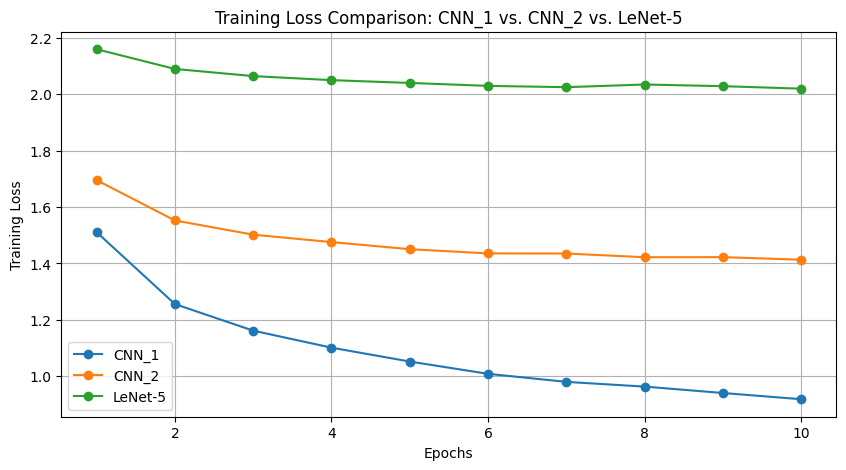

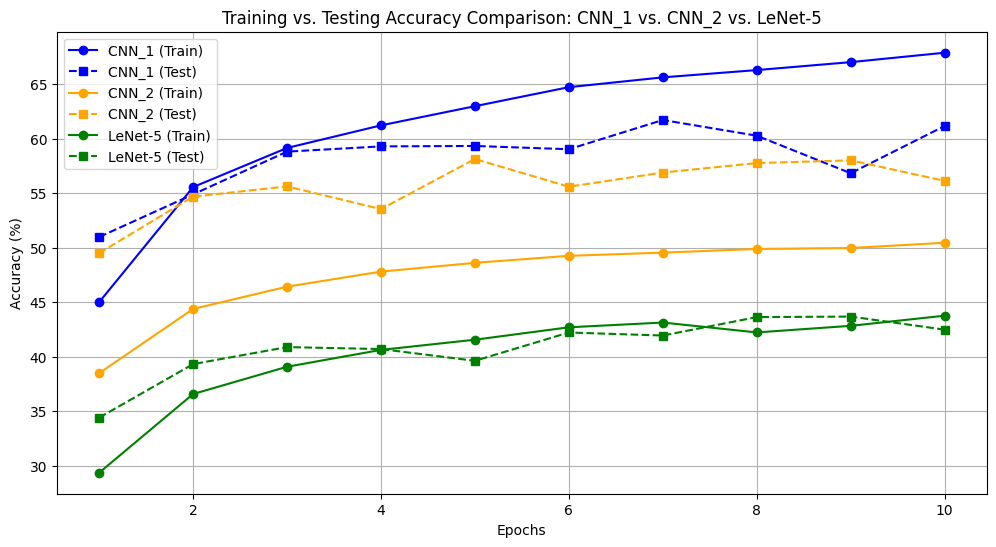

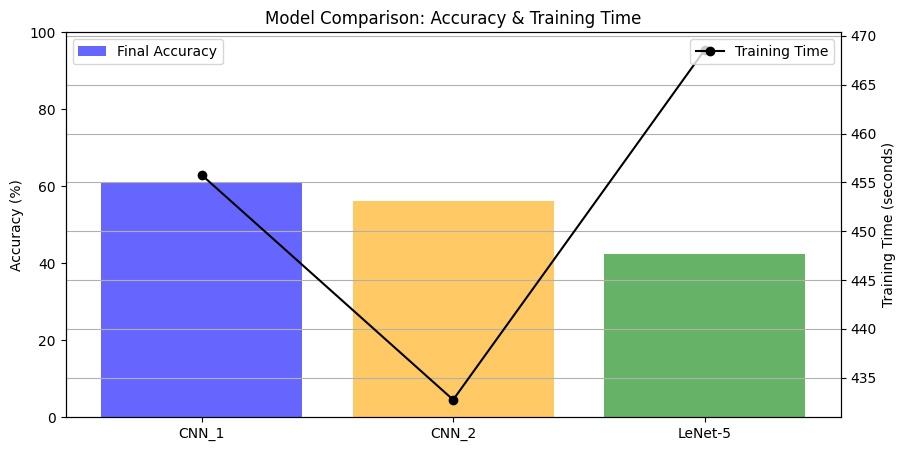

In [49]:
# Extracting results for plotting
train_losses = {name: traditional_results[name]["train_losses"] for name in models}
train_accuracies = {name: traditional_results[name]["train_accuracies"] for name in models}
test_accuracies = {name: traditional_results[name]["test_accuracies"] for name in models}
final_accuracies = {name: traditional_results[name]["final_test_accuracy"] for name in models}
training_times = {name: traditional_results[name]["total_training_time"] for name in models}

# Plot Training Loss Progression
plt.figure(figsize=(10, 5))
for model_name, losses in train_losses.items():
    plt.plot(range(1, len(losses) + 1), losses, label=model_name, marker="o", linestyle="-")

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison: CNN_1 vs. CNN_2 vs. LeNet-5")
plt.legend()
plt.grid(True)
plt.show()

# Define colors for each model
colors = {"CNN_1": "blue", "CNN_2": "orange", "LeNet-5": "green"}

plt.figure(figsize=(12, 6))

for model_name in models:
    plt.plot(range(1, len(train_accuracies[model_name]) + 1), train_accuracies[model_name],
             label=f"{model_name} (Train)", marker="o", linestyle="-", color=colors[model_name])
    plt.plot(range(1, len(test_accuracies[model_name]) + 1), test_accuracies[model_name],
             label=f"{model_name} (Test)", marker="s", linestyle="--", color=colors[model_name])

plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.title("Training vs. Testing Accuracy Comparison: CNN_1 vs. CNN_2 vs. LeNet-5")
plt.legend()
plt.grid(True)
plt.show()


# Plot Training Time and Accuracy Comparison
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for accuracy
ax1.bar(final_accuracies.keys(), final_accuracies.values(), color=['blue', 'orange', 'green'], alpha=0.6, label="Final Accuracy")
ax1.set_ylabel("Accuracy (%)")
ax1.set_ylim(0, 100)

# Line plot for training time
ax2 = ax1.twinx()
ax2.plot(training_times.keys(), training_times.values(), marker="o", color="black", label="Training Time")
ax2.set_ylabel("Training Time (seconds)")

# Labels and title
plt.title("Model Comparison: Accuracy & Training Time")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.grid(True)
plt.show()

In [ ]:
#save the models after they have been trained
torch.save(models["CNN_1"], 'CNN_1.pth')
torch.save(models["CNN_2"], 'CNN_2.pth')
torch.save(models["LeNet-5"], 'LeNet-5.pth')

TypeError: Module.state_dict() missing 1 required positional argument: 'self'

### Genetic algorithm results

In [ ]:
# Define models
models = {
    "CNN_1": CNN,
    "CNN_2": CNN_2,
    "LeNet-5": LeNet5,
}

# Store results
ga_results = {}

for model_name, model_class in models.items():
    print(f"\nRunning Genetic Algorithm for {model_name}...")

    # Run GA for this model
    ga_results[model_name] = run_genetic_algorithm(model_class, CRITERION, POPULATION_SIZE, GENERATIONS, trainloader, testloader, epochs=EPOCHS, mutation_rate=MUTATION_RATE)


Running Genetic Algorithm for CNN_1...

Generation 1
Epoch 1/2 | Loss: 1.7171 | Train_Accuracy: 36.43% | Time: 42.86s
Epoch 2/2 | Loss: 1.3069 | Train_Accuracy: 53.49% | Time: 43.20s
Epoch 1/2 | Loss: 1.7142 | Train_Accuracy: 36.81% | Time: 42.80s
Epoch 2/2 | Loss: 1.3355 | Train_Accuracy: 51.97% | Time: 42.57s
Epoch 1/2 | Loss: 1.7314 | Train_Accuracy: 35.85% | Time: 42.97s
Epoch 2/2 | Loss: 1.3435 | Train_Accuracy: 51.67% | Time: 42.50s
Epoch 1/2 | Loss: 1.7254 | Train_Accuracy: 36.23% | Time: 43.07s
Epoch 2/2 | Loss: 1.3413 | Train_Accuracy: 51.70% | Time: 43.04s
Best accuracy in generation 1 = 56.1100%
Time taken for generation 1: 359.60 seconds

Generation 2
Epoch 1/2 | Loss: 1.5023 | Train_Accuracy: 45.57% | Time: 42.41s
Epoch 2/2 | Loss: 1.2465 | Train_Accuracy: 55.48% | Time: 42.93s
Epoch 1/2 | Loss: 1.5126 | Train_Accuracy: 44.91% | Time: 43.13s
Epoch 2/2 | Loss: 1.3009 | Train_Accuracy: 53.35% | Time: 44.10s
Best accuracy in generation 2 = 58.6500%
Time taken for generation 


CNN_1 Final Best Accuracy: 58.65%
CNN_1 Time Taken Per Generation: [359.5983371734619, 180.88535618782043]

CNN_2 Final Best Accuracy: 57.46%
CNN_2 Time Taken Per Generation: [343.7963285446167, 170.9058871269226]

LeNet-5 Final Best Accuracy: 49.03%
LeNet-5 Time Taken Per Generation: [372.9871938228607, 185.52979731559753]
+---------+--------------------+-------------------------+
|  Model  | Final Accuracy (%) | Total Training Time (s) |
+---------+--------------------+-------------------------+
|  CNN_1  |       58.65        |    540.4836933612823    |
|  CNN_2  |       57.46        |    514.7022156715393    |
| LeNet-5 |       49.03        |    558.5169911384583    |
+---------+--------------------+-------------------------+


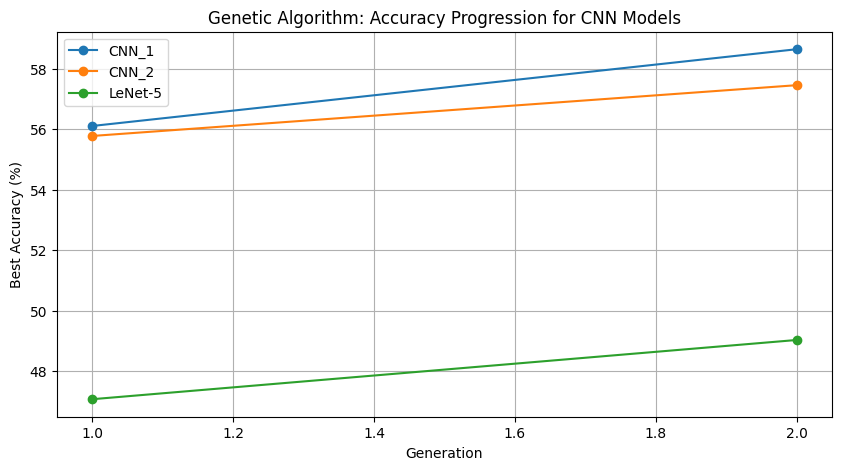

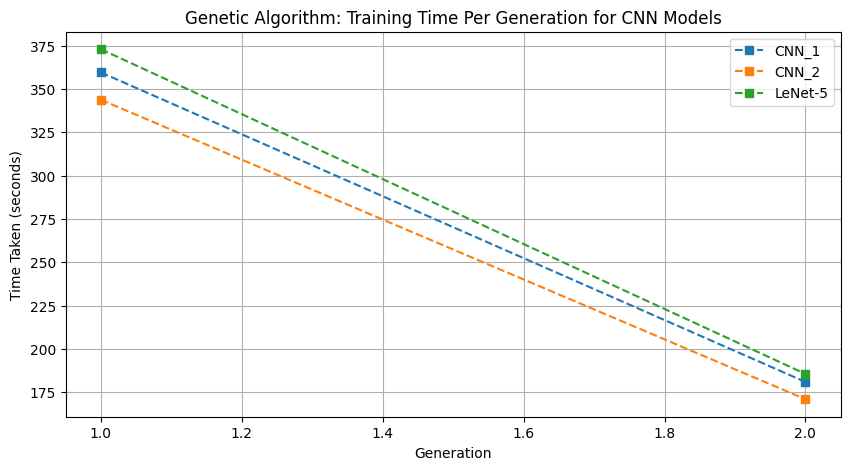

In [ ]:
# compare the models
# Print Summary for Each Model
for model_name, results in ga_results.items():
    print(f"\n{model_name} Final Best Accuracy: {results['best_accuracies'][-1]:.2f}%")
    print(f"{model_name} Time Taken Per Generation: {results['generation_times']}")

# Create a DataFrame to compare the genetic algorithm results
ga_comparison_df = pd.DataFrame(columns=["Model", "Final Accuracy (%)", "Total Training Time (s)"])

for model_name, results in ga_results.items():
    final_accuracy = results["best_accuracies"][-1]
    total_training_time = sum(results["generation_times"])
    ga_comparison_df = ga_comparison_df.append({"Model": model_name, "Final Accuracy (%)": final_accuracy, "Total Training Time (s)": total_training_time}, ignore_index=True)

print(ga_comparison_df)

# Extract results for visualization
# Extract best accuracies and generation times for each model
best_accuracies = {name: results["best_accuracies"] for name, results in ga_results.items()}
generation_times = {name: results["generation_times"] for name, results in ga_results.items()}
average_start_accuracies = {name: results["average_start_accuracies"] for name, results in ga_results.items()}


plt.figure(figsize=(10, 5))

# Plot accuracy curves for all models
for model_name, accuracies in best_accuracies.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker="o", linestyle="-", label=model_name)

plt.xlabel("Generation")
plt.ylabel("Best Accuracy (%)")
plt.title("Genetic Algorithm: Accuracy Progression for CNN Models")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))

# Plot average start accuracies for all models
for model_name, accuracies in average_start_accuracies.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, marker="o", linestyle="-", label=model_name)

plt.xlabel("Generation")
plt.ylabel("Average Start Accuracy (%)")
plt.title("Genetic Algorithm: Average Start Accuracy for CNN Models")
plt.legend()
plt.grid(True)
plt.show()

# Plot training time curves for all models
for model_name, times in generation_times.items():
    plt.plot(range(1, len(times) + 1), times, marker="s", linestyle="--", label=model_name)

plt.xlabel("Generation")
plt.ylabel("Time Taken (seconds)")
plt.title("Genetic Algorithm: Training Time Per Generation for CNN Models")
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# save the best models
torch.save(ga_results["CNN_1"]["best_model"].state_dict(), "ga_cnn_1.pth")
torch.save(ga_results["CNN_2"]["best_model"].state_dict(), "ga_cnn_2.pth")
torch.save(ga_results["LeNet-5"]["best_model"].state_dict(), "ga_lenet5.pth")


---
## **Ensemble Learning: Combining GA-Trained CNNs** <a id="Ensemble-Learning-Combining-GA-Trained-CNNs"></a>
*Applying ensemble methods like averaging, and weighted ensembling*

In [58]:
class WeightedEnsemble(nn.Module):
    def __init__(self, models, accuracies):
        """
        Initializes a weighted ensemble of models.

        Args:
            models (list): List of PyTorch models.
            accuracies (list): Corresponding accuracy scores of the models.
        """
        super(WeightedEnsemble, self).__init__()
        self.models = models

        # Normalize accuracies to sum to 1 (to create valid weights)
        total_accuracy = sum(accuracies)
        self.weights = [acc / total_accuracy for acc in accuracies]

    def forward(self, x):
        # Get predictions from each model and weight them
        weighted_outputs = [
            model(x) * weight for model, weight in zip(self.models, self.weights)
        ]

        # Sum the weighted outputs
        outputs = torch.stack(weighted_outputs, dim=0).sum(dim=0)
        return outputs

In [ ]:
# Define models and their accuracies
models = [ga_results["CNN_1"]["best_model"], ga_results["CNN_2"]["best_model"], ga_results["LeNet-5"]["best_model"]]
accuracies = [
    ga_results["CNN_1"]["best_accuracies"][-1],
    ga_results["CNN_2"]["best_accuracies"][-1],
    ga_results["LeNet-5"]["best_accuracies"][-1]
]

# Create a weighted ensemble model
weighted_ensemble_model = WeightedEnsemble(models, accuracies)

# Evaluate the weighted ensemble model
ensemble_accuracy = test_nn(weighted_ensemble_model, testloader)
print(f"Weighted Ensemble Model Accuracy: {ensemble_accuracy:.2f}%")

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [ ]:
# from source [6] modified to be more dynamic and to instead average the outputs of the models
# define a class to ensemble multiple models
class Ensemble(nn.Module):
    def __init__(self, models):
        super(Ensemble, self).__init__()
        self.models = models

    def forward(self, x):
        # Get predictions from each model
        outputs = [model(x) for model in self.models]
        # Average the predictions
        outputs = torch.stack(outputs, dim=0).mean(dim=0)
        return outputs
#end of source [6]

In [62]:
# # combine the GA models into an ensemble
ensemble_model = Ensemble([ga_results["CNN_1"]["best_model"], ga_results["CNN_2"]["best_model"], ga_results["LeNet-5"]["best_model"]])

# Test the ensemble model
ensemble_accuracy = test_nn(ensemble_model, testloader)
print(f"Ensemble Model Accuracy: {ensemble_accuracy:.2f}%")

Ensemble Model Accuracy: 62.36%


---

## **Evaluation and Visualization** <a id="Evaluation-and-Visualization"></a>
*Visualizing loss, accuracy trends, and decision boundaries of CNN models.*

In [ ]:
def evaluate_model(model, testloader, classes, use_gpu=True):
    """
    Evaluates a CNN model by computing overall accuracy, per-class accuracy, and confusion matrix.

    Args:
        model: PyTorch model to evaluate.
        testloader: DataLoader for testing data.
        classes: List of class labels.
        use_gpu (bool, optional): Enables GPU acceleration. Default is True.

    Returns:
        results (dict): Dictionary containing:
            - 'class_accuracies': Dictionary of per-class accuracy.
            - 'accuracy': Overall test accuracy.
            - 'confusion_matrix': Confusion matrix (numpy array).
    """
    # Move model to GPU if available
    device = torch.device("cuda" if use_gpu and torch.cuda.is_available() else "cpu")
    model.to(device)

    # Evaluate the model
    accuracy = test_nn(model, testloader, use_gpu=use_gpu)

    # Compute per-class accuracy
    test_class_accuracies = test_nn_per_class(model, testloader, classes, use_gpu=use_gpu)

    # Compute Confusion Matrix
    all_preds = []
    all_labels = []
    model.eval()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predictions = torch.max(outputs, 1)

            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    conf_matrix = confusion_matrix(all_labels, all_preds)

    # Return evaluation results
    results = {
        "class_accuracies": test_class_accuracies,
        "accuracy": accuracy,
        "confusion_matrix": conf_matrix,
    }

    return results


In [37]:
def visualize_evaluation_results(results, classes):
    """
    Visualizes loss, accuracy trends, and confusion matrix from model evaluation results.

    Args:
        results (dict): Dictionary containing evaluation results.
        classes (list): List of class labels.
        train (bool, optional): If True, plots training loss and accuracy.
    """
    # **2️⃣ Plot Per-Class Accuracy**
    plt.figure(figsize=(10, 5))
    plt.bar(results["class_accuracies"].keys(), results["class_accuracies"].values(), color='blue')
    plt.xlabel("Classes")
    plt.ylabel("Accuracy (%)")
    plt.title("Model Accuracy Per Class")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.show()

    # **3️⃣ Generate Confusion Matrix**
    print("\nGenerating confusion matrix...")

    plt.figure(figsize=(8, 6))
    sns.heatmap(results["confusion_matrix"], annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()


In [34]:
# creat a dictionary to store model name, model accuracy and model training time
evaluation_results = {}

Finished per-class testing.


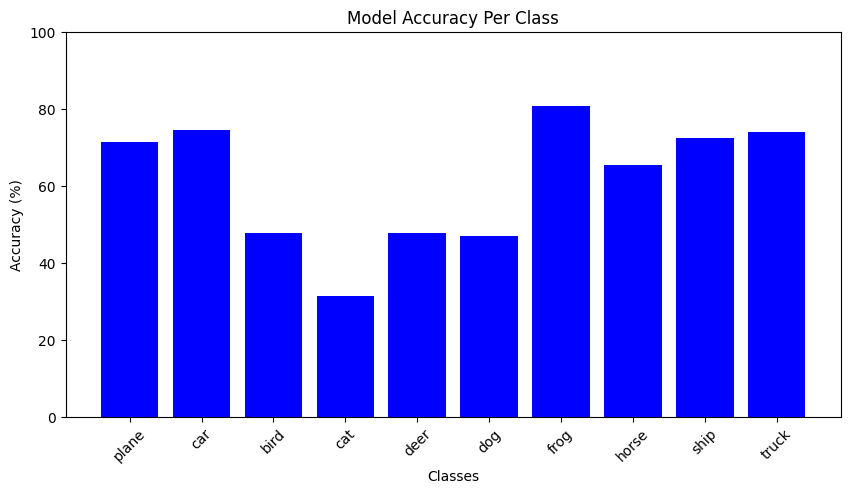


Generating confusion matrix...


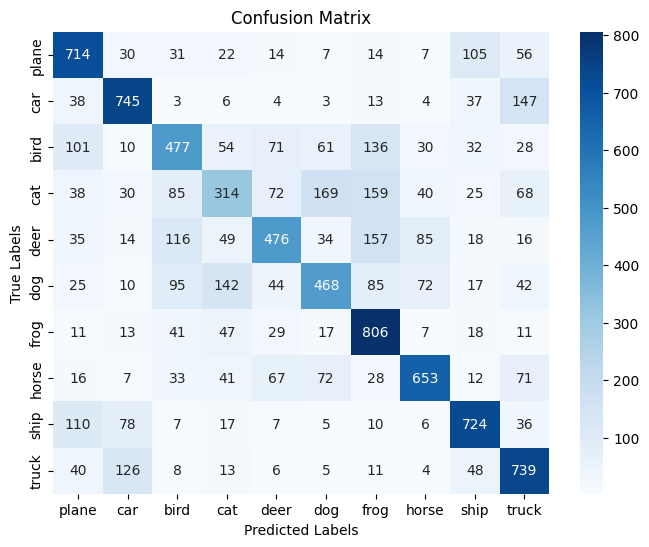

In [ ]:
# Evaluate and visulise the results of the 10 epoch trained models
# Evaluate and visualize CNN_1
results_cnn1 = evaluate_model(models["CNN_1"], testloader, classes, use_gpu=USE_GPU)
visualize_evaluation_results(results_cnn1, classes)

#store the results in the evaluation results dictionary
evaluation_results["CNN_1"] = {
    "accuracy": results_cnn1["accuracy"],
    "training_time": traditional_results["CNN_1"]["total_training_time"]
}

Finished per-class testing.


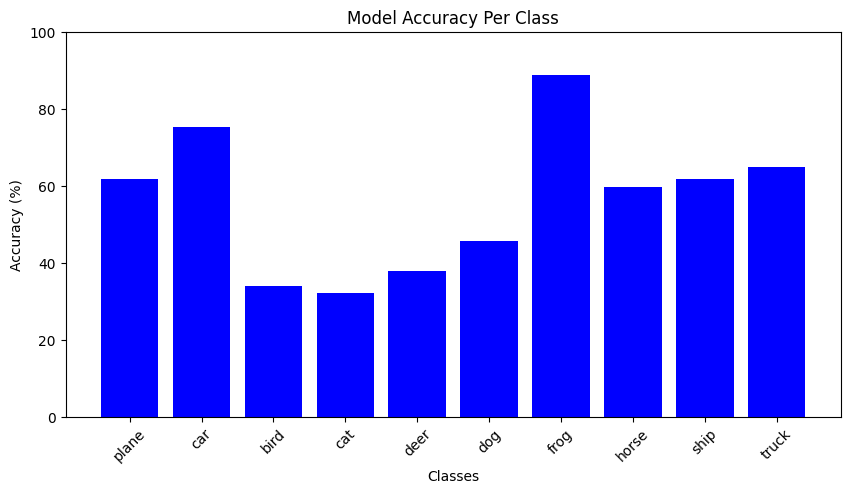


Generating confusion matrix...


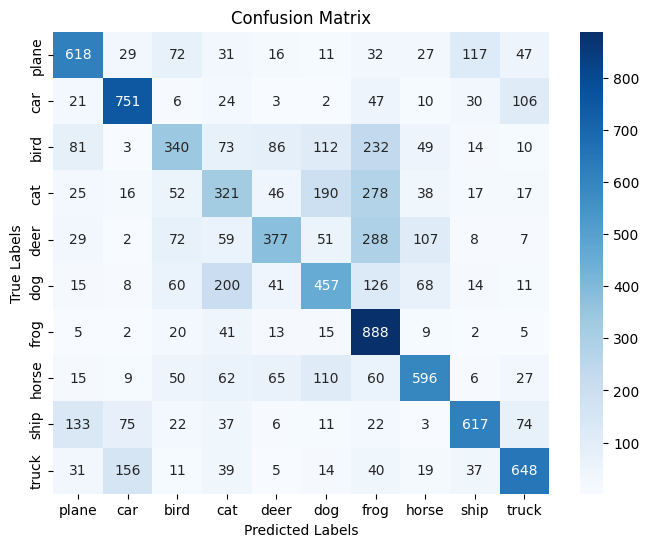

In [39]:
# Evaluate and visualize CNN_2
results_cnn2 = evaluate_model(models["CNN_2"], testloader, classes, use_gpu=USE_GPU)
visualize_evaluation_results(results_cnn2, classes)
evaluation_results["CNN_2"] = {
    "accuracy": results_cnn2["accuracy"],
    "training_time": traditional_results["CNN_2"]["total_training_time"]
    }

Finished per-class testing.


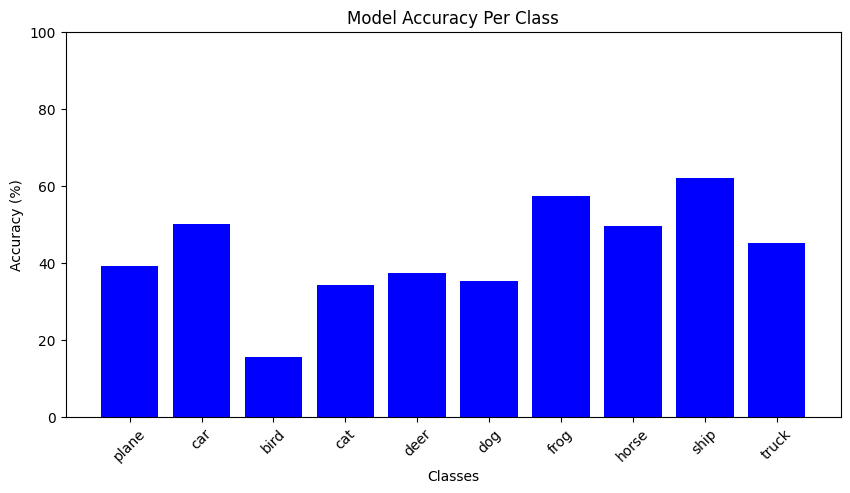


Generating confusion matrix...


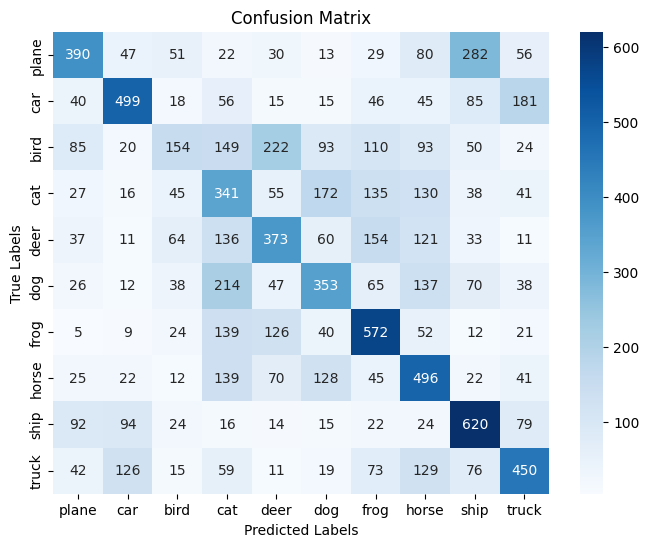

In [40]:
# Evaluate and visualize LeNet-5
results_lenet5 = evaluate_model(models["LeNet-5"], testloader, classes, use_gpu=USE_GPU)
visualize_evaluation_results(results_lenet5, classes)
evaluation_results["LeNet-5"] = {
    "accuracy": results_lenet5["accuracy"],
    "training_time": traditional_results["LeNet-5"]["total_training_time"]
    }

Finished per-class testing.


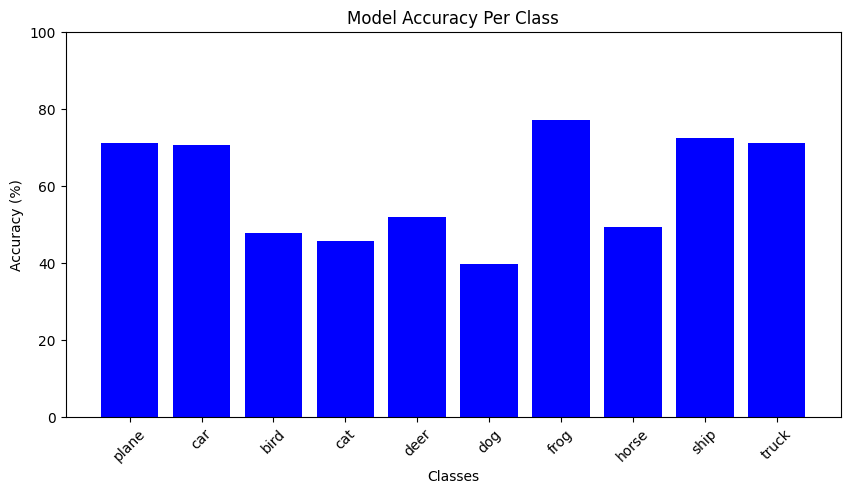


Generating confusion matrix...


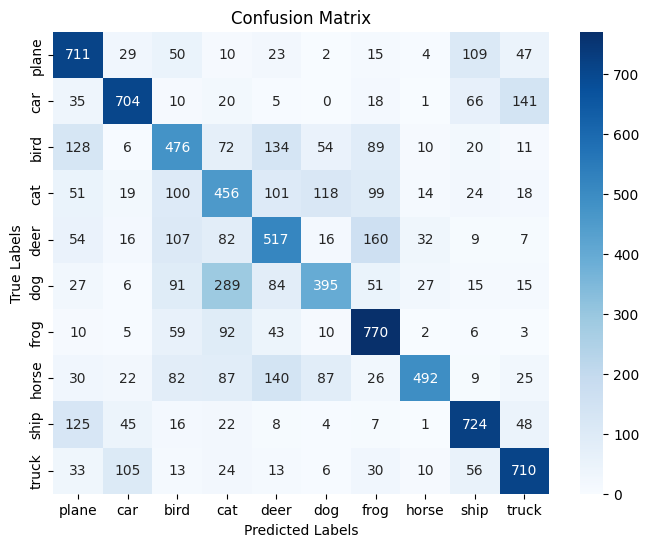

In [ ]:
# Evaluate the best CNN model from GA
best_cnn_model = ga_results["CNN_1"]["best_model"]
best_cnn_results = evaluate_model(best_cnn_model, testloader, classes, use_gpu=USE_GPU)

# Visualize the evaluation results
visualize_evaluation_results(best_cnn_results, classes)
evaluation_results["GA CNN_1"] = {
    "accuracy": best_cnn_results["accuracy"],
    "training_time": sum(ga_results["CNN_1"]["generation_times"])
}

Finished per-class testing.


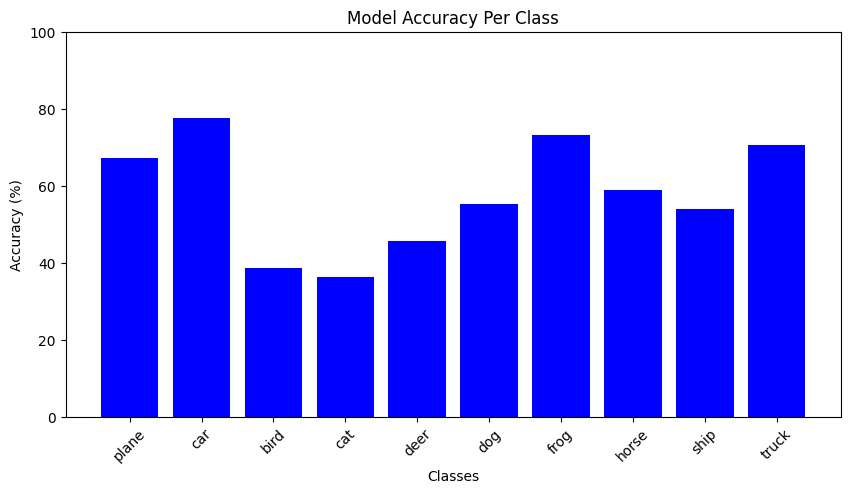


Generating confusion matrix...


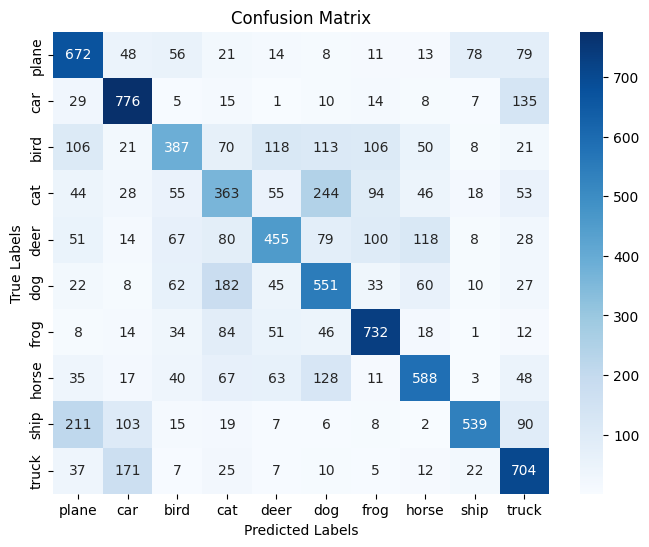

In [ ]:
# Evaluate and visualize the best CNN_2 model from GA
best_cnn2_model = ga_results["CNN_2"]["best_model"]
best_cnn2_results = evaluate_model(best_cnn2_model, testloader, classes, use_gpu=USE_GPU)

visualize_evaluation_results(best_cnn2_results, classes)
evaluation_results["GA CNN_2"] = {
    "accuracy": best_cnn2_results["accuracy"],
    "training_time": sum(ga_results["CNN_2"]["generation_times"])
}

Finished per-class testing.


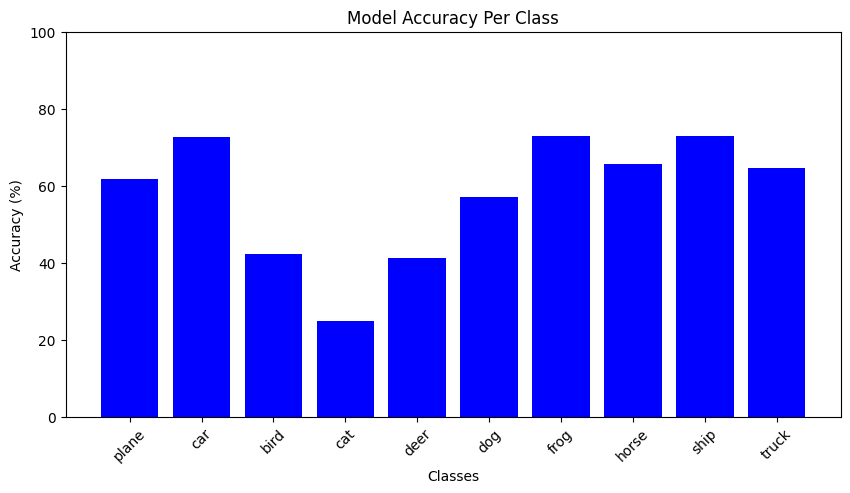


Generating confusion matrix...


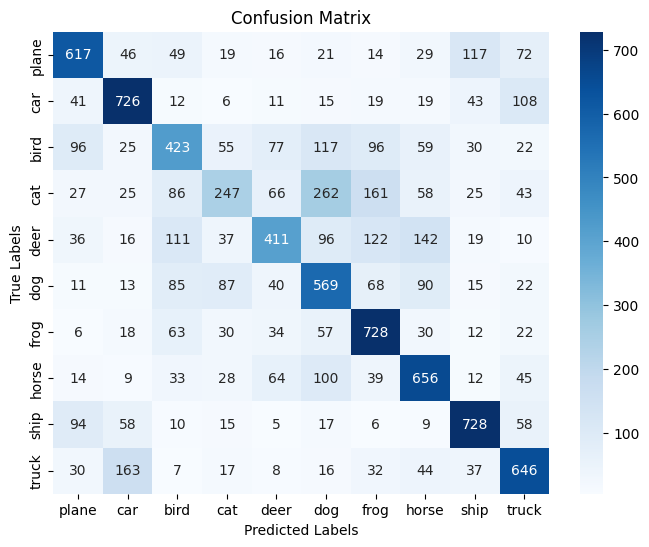

In [ ]:
# Evaluate and visualize the best LeNet-5 model from GA
best_lenet_model = ga_results["LeNet-5"]["best_model"]
best_lenet_results = evaluate_model(best_lenet_model, testloader, classes, use_gpu=USE_GPU)

visualize_evaluation_results(best_lenet_results, classes)
evaluation_results["GA LeNet-5"] = {
    "accuracy": best_lenet_results["accuracy"],
    "training_time": sum(ga_results["LeNet-5"]["generation_times"])
}

In [ ]:
#create a function to compare the accuracy of models and print a table of the results
def compare_models(results):
    """
    Compares the accuracy of different models and prints a table of the results.

    Args:
        results (dict): Dictionary containing evaluation results for each model.
    """
    # Create a DataFrame to compare the results
    data = {
        "Model": [],
        "Final Accuracy (%)": [],
        "Training Time (s)": []
    }

    for model_name, model_results in results.items():
        accuracy = model_results["accuracy"]
        training_time = model_results["training_time"]
        data["Model"].append(model_name)
        data["Final Accuracy (%)"].append(f"{accuracy:.2f}")
        data["Training Time (s)"].append(f"{training_time:.2f}")

    df = pd.DataFrame(data)
    print(df)

In [42]:
compare_models(evaluation_results)

+---------+--------------------+-------------------+
|  Model  | Final Accuracy (%) | Training Time (s) |
+---------+--------------------+-------------------+
|  CNN_1  |       61.16        |       455.77      |
|  CNN_2  |       56.13        |       432.74      |
| LeNet-5 |       42.48        |       468.57      |
+---------+--------------------+-------------------+


---
## **Conclusion** <a id="Conclusion"></a>
*Key takeaways, strengths, and future directions for GA-based CNN training.*



---
## **Tutorial comparison** <a id="tutorial-comparison"></a>


---
## **References** <a id="References"></a>
*Citations and references for further reading.*

source [1] : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html <br>
source [2] : https://www.geeksforgeeks.org/how-to-implement-genetic-algorithm-using-pytorch/ <br>
source [3] : https://github.com/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-lenet5-cifar10.ipynb <br>
source [4] : https://www.kaggle.com/code/androbomb/using-cnn-to-classify-images-w-pytorch <br>
source [5] : https://medium.com/@alexppppp/how-to-train-an-ensemble-of-convolutional-neural-networks-for-image-classification-8fc69b087d3 <br>